<a href="https://colab.research.google.com/github/Jake0925/DeepLearning/blob/master/Seaborn_%EC%8B%9C%EA%B3%84%EC%97%B4%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%8B%9C%EA%B0%81%ED%99%94_2_Pivot_dataime_Statsmodels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()
df=sns.load_dataset('flights')

In [15]:
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


# Pivot
- 기존 dataframe의 데이터 형태를 바꾼다

In [16]:
df_h=df.pivot(index='month', columns='year', values='passengers')
df_h

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


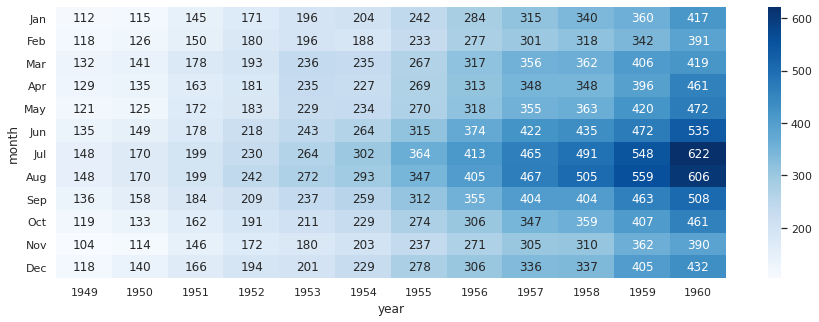

In [17]:
plt.figure(figsize=(15, 5))
sns.heatmap(df_h, 
            annot=True, fmt='.0f', cmap='Blues')

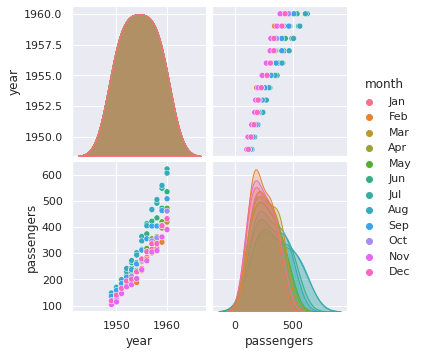

In [18]:
sns.pairplot(data=df, hue='month')

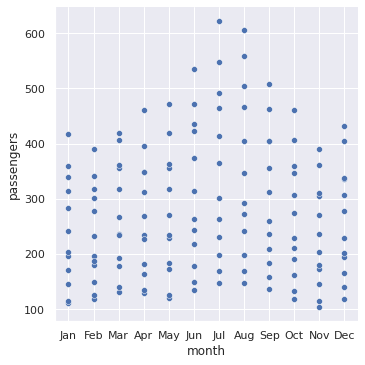

In [19]:
sns.relplot(data=df, x='month', y='passengers')

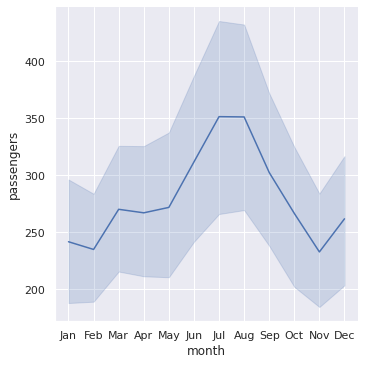

In [20]:
sns.relplot(data=df, x='month', y='passengers', kind='line')

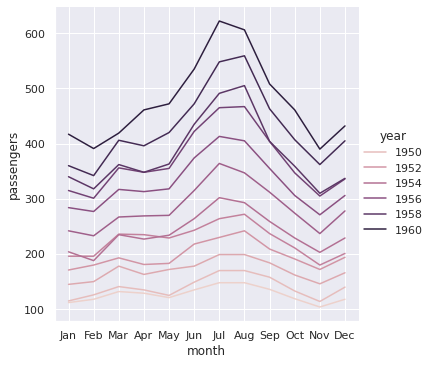

In [21]:
sns.relplot(data=df, x='month', y='passengers', kind='line', hue='year')

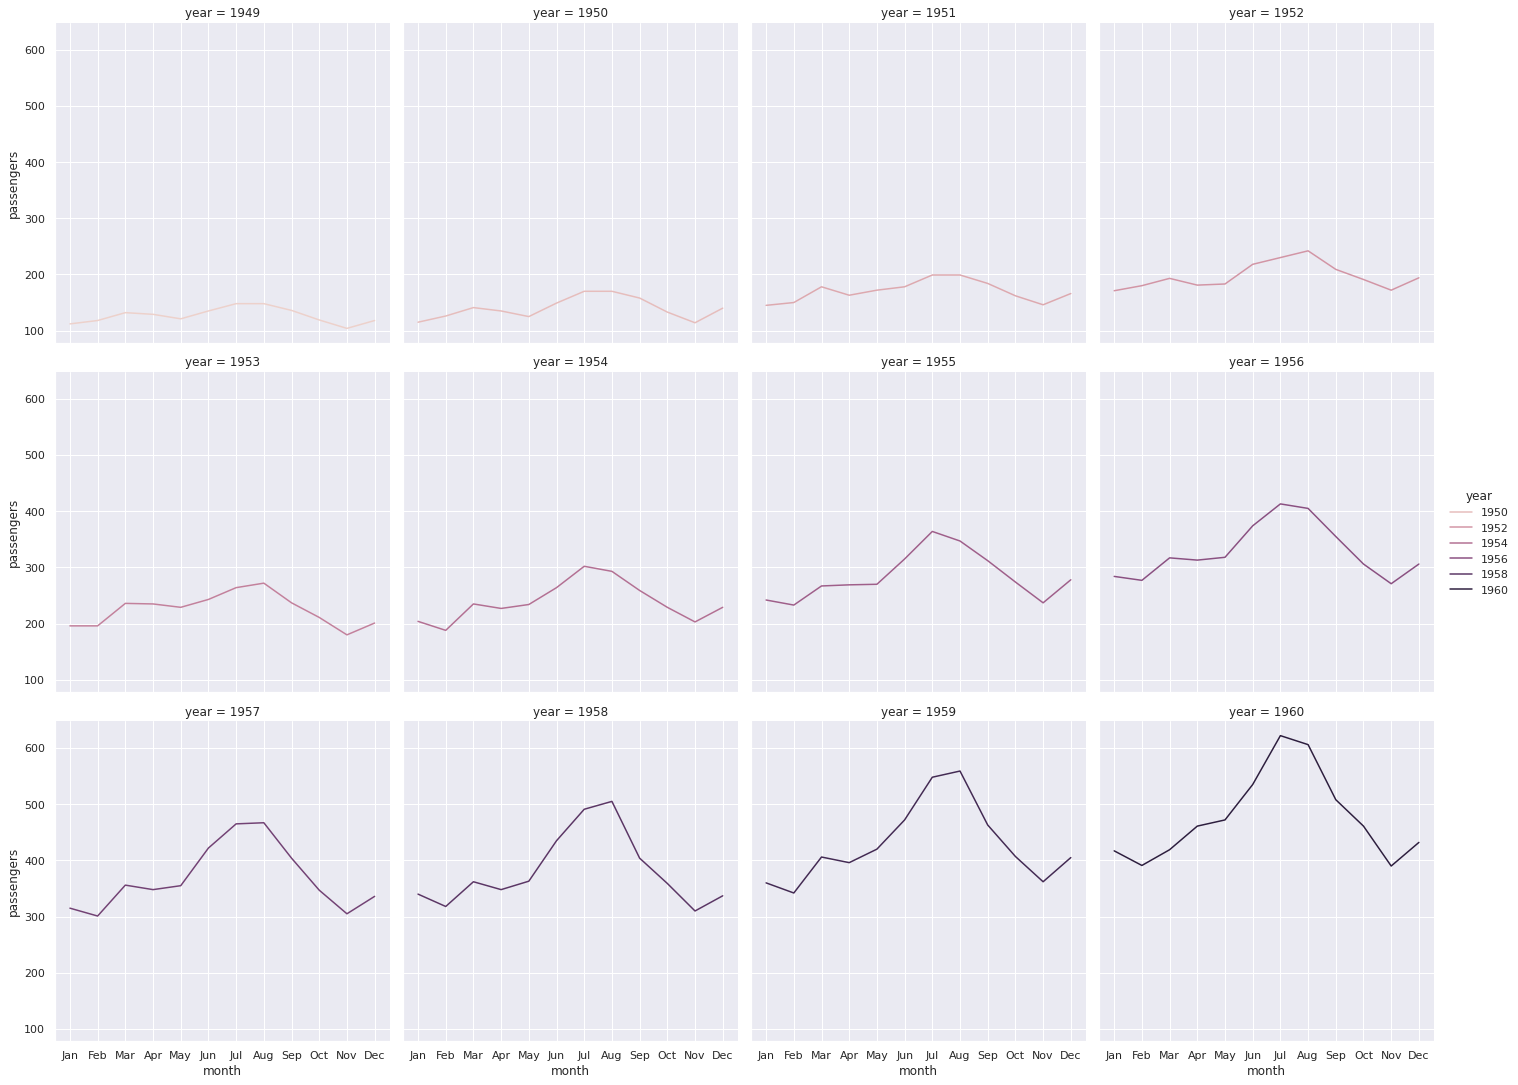

In [22]:
sns.relplot(data=df, x='month', y='passengers', kind='line', 
            hue='year', col='year',
            col_wrap=4) 

# dataime형태로 변환

In [23]:
from datetime import datetime

In [24]:
year = 2021
month = 'June'

s=f'{year} {month} 17' #2021년 6월 17일
d=datetime.strptime(s, '%Y %B %d')
d.strftime('%Y-%m-%d')


'2021-06-17'

In [39]:
# 각 column의 year와 month데이터를 하나의 데이터로 묶어준다
def find_datetime(row):
  year = row['year']
  month = row['month']
 
  s=f'{year} {month} 1'
  d=datetime.strptime(s, '%Y %b %d')
  return d.strftime('%Y-%m-%d')

In [40]:
row = {'year': 1949, 'month': 'Jan'}
find_datetime(row)

'1949-01-01'

In [46]:
df=sns.load_dataset('flights')
df['date'] = df.apply(find_datetime, axis=1)
df.head()

,year,month,passengers,date
0,1949,Jan,112,1949-01-01
1,1949,Feb,118,1949-02-01
2,1949,Mar,132,1949-03-01
3,1949,Apr,129,1949-04-01
4,1949,May,121,1949-05-01


In [47]:
df['date'] = pd.to_datetime(df['date']) # to_datetime - datetime 자료형변경 기존 object타입에서 datetime64로 변경됨
df['date'].head()

0   1949-01-01
1   1949-02-01
2   1949-03-01
3   1949-04-01
4   1949-05-01
Name: date, dtype: datetime64[ns]

전체적인 그래프롤 통해 매년 승객이 증가하고 있는것을 알수있고
각 연도별 그래프롤 보면 특히 여름에 많이 증가함을 알수있다

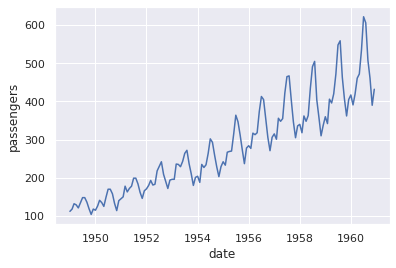

In [49]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

sns.lineplot(data=df, x='date', y = 'passengers')

# Statsmodels
- Trend, Seasonal, Tesidual을 한번에 볼수 있다
- pip사용시: pip install statsmodels
- 아나콘다: conda install -c conda-forge statsmodels

사이트: https://www.statsmodels.org/stable/install.html#

In [50]:
df_date = df[['date', 'passengers']] # 항목중 date와 passengers만 표시한다
df_date

,date,passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


Index 설정 변경하기

In [52]:
df_date = df[['date', 'passengers']].set_index('date') # index를 date값으로 변경
df_date.head()

,passengers
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


시계열분해
Additive Model

y = Lever + Trend + Seasonality + Noise

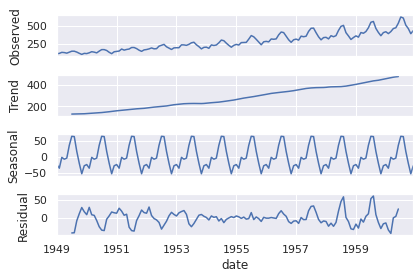

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(df_date, model='additive')
d = decomp.plot() # Residual - 앞과 뒤값의 차이표시

Multiplicative Model

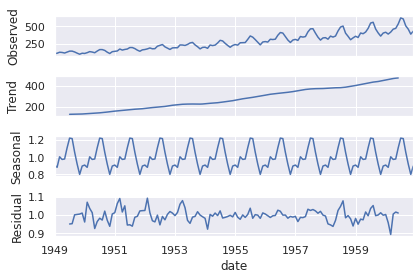

In [56]:
decomp = seasonal_decompose(df_date, model='multiplicative')
d = decomp.plot() 